## Exploratory Data Analysis of Titanic Dataset using Various Graphs

### Problem Statement:

The titanic dataset provides observations for each passenger and the survival outcome. This problem statement entails predecting whether a passenger would survive or not given the features such as passenger class, sex, fair, age, number of siblings/spouse aboard, number of parents/children aboard and others. In this file, I have explored various details and done exploratory data analysis for this dataset.

#### Data Dictionary:
Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Gender of passenger

Age	Age in years	
sibsp	No. of siblings / spouses aboard the Titanic	
parch   No. of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [2]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# Import test and train datasets
df_train = pd.read_csv('https://raw.githubusercontent.com/Cshekar24/Datasets-for-Practice/main/titanic_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Cshekar24/Datasets-for-Practice/main/titanic_test.csv')

# View first lines of training data
df_train.head(n=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
# View first lines of test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Check the info for feature names, data types, missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#As per data definition change the data type of survived and pclass
for i in ['Survived', 'Pclass']:
    df_train[i]=df_train[i].astype('object')

**Interpretation:**
- The dataset contains 891 rows/records and 12 columns
- There are 5 numerical columns and 7 categorical columns
- There are some missing values in Age, Cabin and Embarked features. 

In [7]:
# check out summary statistics of numeric columns (of df_train)
df_train.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


**Interpretation:**
- People of all age have travelled in Titanic ranging from 0.5 years to 80 years. 75% of the people are below 38 years old. 
- Min. fare of the passengers travelling is 0(indicates there are some crew members) and max price is 512dollars. 50% of the fare is bleow 14.5$

In [8]:
# cardinality of the columns to check unique values in each feature. 
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Missing Values Treatment

In [9]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
#Since Embarked feature is categorical, we can fill the missing values with Mode.
df_train['Embarked']=df_train['Embarked'].fillna('S')

In [11]:
#Age is having 177 missing values. First I have tried to fill some values with respect to the Fare.
df_train['Age']=df_train['Age'].fillna(df_train.groupby('Fare')['Age'].transform('mean'))
df_train['Age'].isna().sum()

43

In [12]:
#Balance 43 missing values we will replace with the mean value
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())

### Lets explore the data with Visualization using various graphs

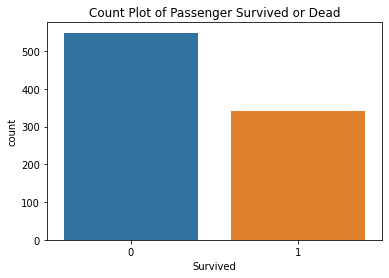

In [13]:
# BarPlot of Titanic survival, which is our target variable
sns.countplot(x='Survived', data=df_train)
plt.title("Count Plot of Passenger Survived or Dead")
plt.show()

**Interpretation:**
- In the training dataset, less people survived. More people have died.

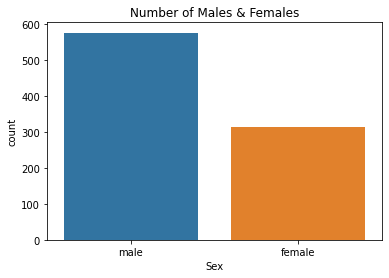

male      577
female    314
Name: Sex, dtype: int64

In [14]:
# Check the number of males and females in the dataset(df_train)
sns.countplot(x='Sex', data=df_train)
plt.title("Number of Males & Females")
plt.show()
df_train['Sex'].value_counts()

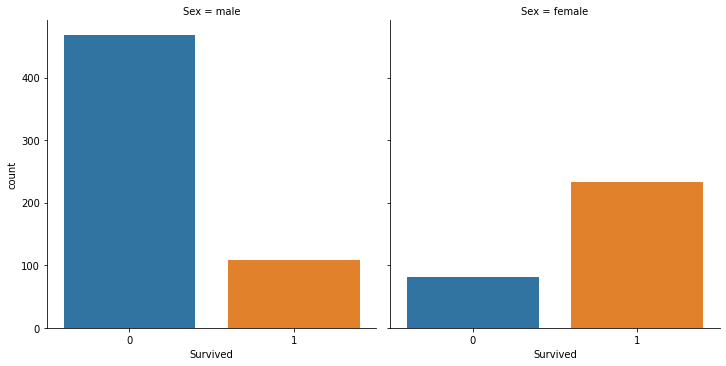

In [15]:
# Plot Titanic dataset feature 'Survived' split (faceted) over the feature 'Sex'
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train)
plt.show()

In [16]:
# Lets check how many women and how many men survived
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

**Interpretation:**
- Men have lost more number of lives than women
- Women were more likely to survive than men

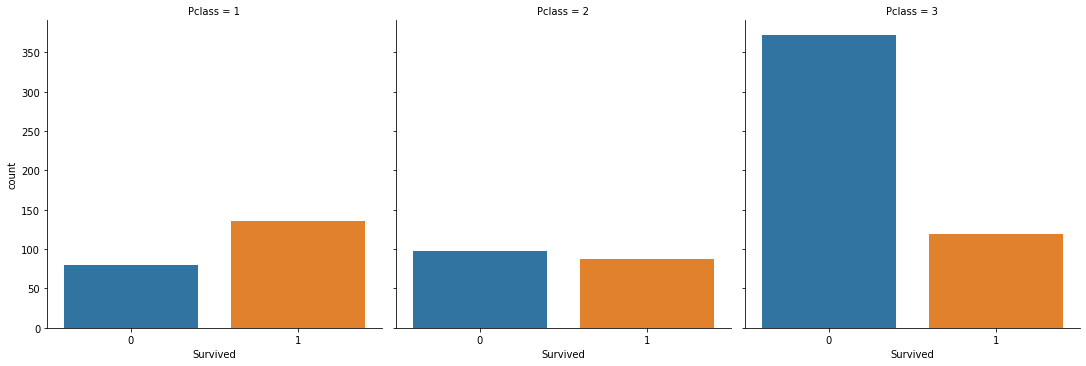

In [17]:
# Bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Pclass'
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train)
plt.show()

**Interpretation:**
- Passengers who travelled in first class were more likely to survive. 
- On the other hand, passengers travelling in third class were more unlikely to survive.

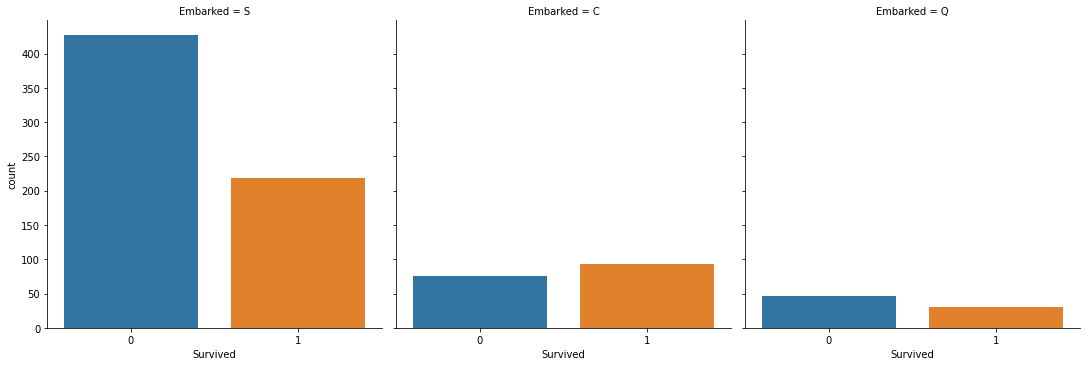

In [18]:
# Bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Embarked'
sns.factorplot(x='Survived', col='Embarked', kind='count', data=df_train)
plt.show()

**Interpretation:**
- Passengers that embarked in Southampton were less likely to survive.

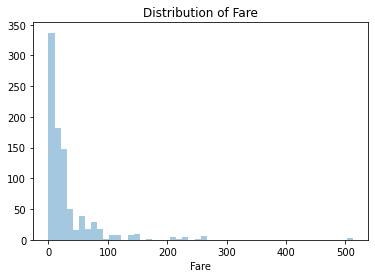

In [19]:
# Plot a histogram of the 'Fare' column of df_train
sns.distplot(df_train.Fare, kde=False)
plt.title("Distribution of Fare")
plt.show()

**Interpretation:**
- Most passengers paid less than 100 dollars for travelling with the Titanic

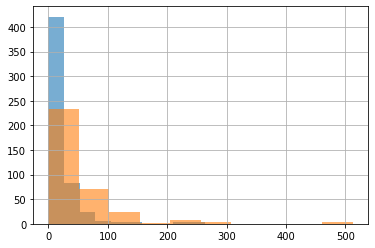

In [20]:
# plot the column 'Fare' for each value of 'Survived' on the same plot.
df_train.groupby('Survived').Fare.hist(alpha=0.6)
plt.show()

**Interpretation:**
- It looks as though those that paid more had a higher chance of surviving.

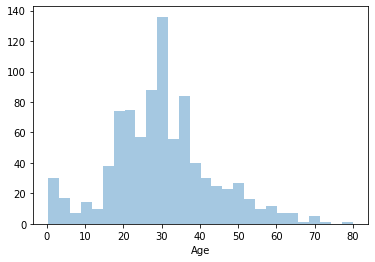

In [21]:
#Pplot a histogram of the 'Age' column of df_train. we'll have to drop cabin column which is having null values before doing so
df_train_drop = df_train.drop('Cabin', 1)
sns.distplot(df_train_drop.Age, kde=False)
plt.show()

**Interpretation:**
- We can notice that many people are in the age group of 15-50 who were onboard 

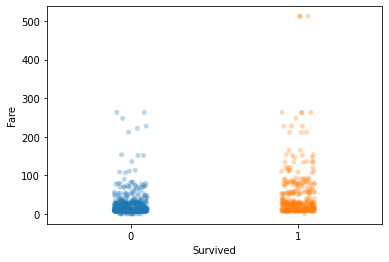

In [22]:
# Plot a strip plot & a swarm plot of 'Fare' with 'Survived' on the x-axis
sns.stripplot(x='Survived', y='Fare', data=df_train, alpha=0.3, jitter=True)
plt.show()

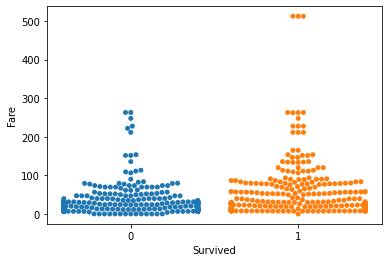

In [23]:
sns.swarmplot(x='Survived', y='Fare', data=df_train)
plt.show()

**Interpretation:**
- Fare definitely seems to be correlated with survival aboard the Titanic.

In [24]:
# Lets check out summary statistics of 'Fare' as a function of survival
df_train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


**Interpretation:**
- 75% of people not survived have paid less than 26dollars.
- The super rich people who paid 512 dollars have survived. 

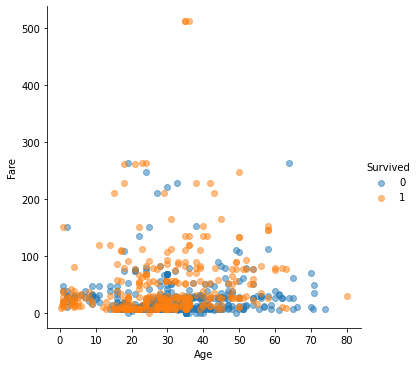

In [25]:
# Plot a scatter plot of 'Age' against 'Fare', colored by 'Survived'
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5})
plt.show()

**Interpretation:**
- It looks like those who survived either paid quite a bit for their ticket or they were young

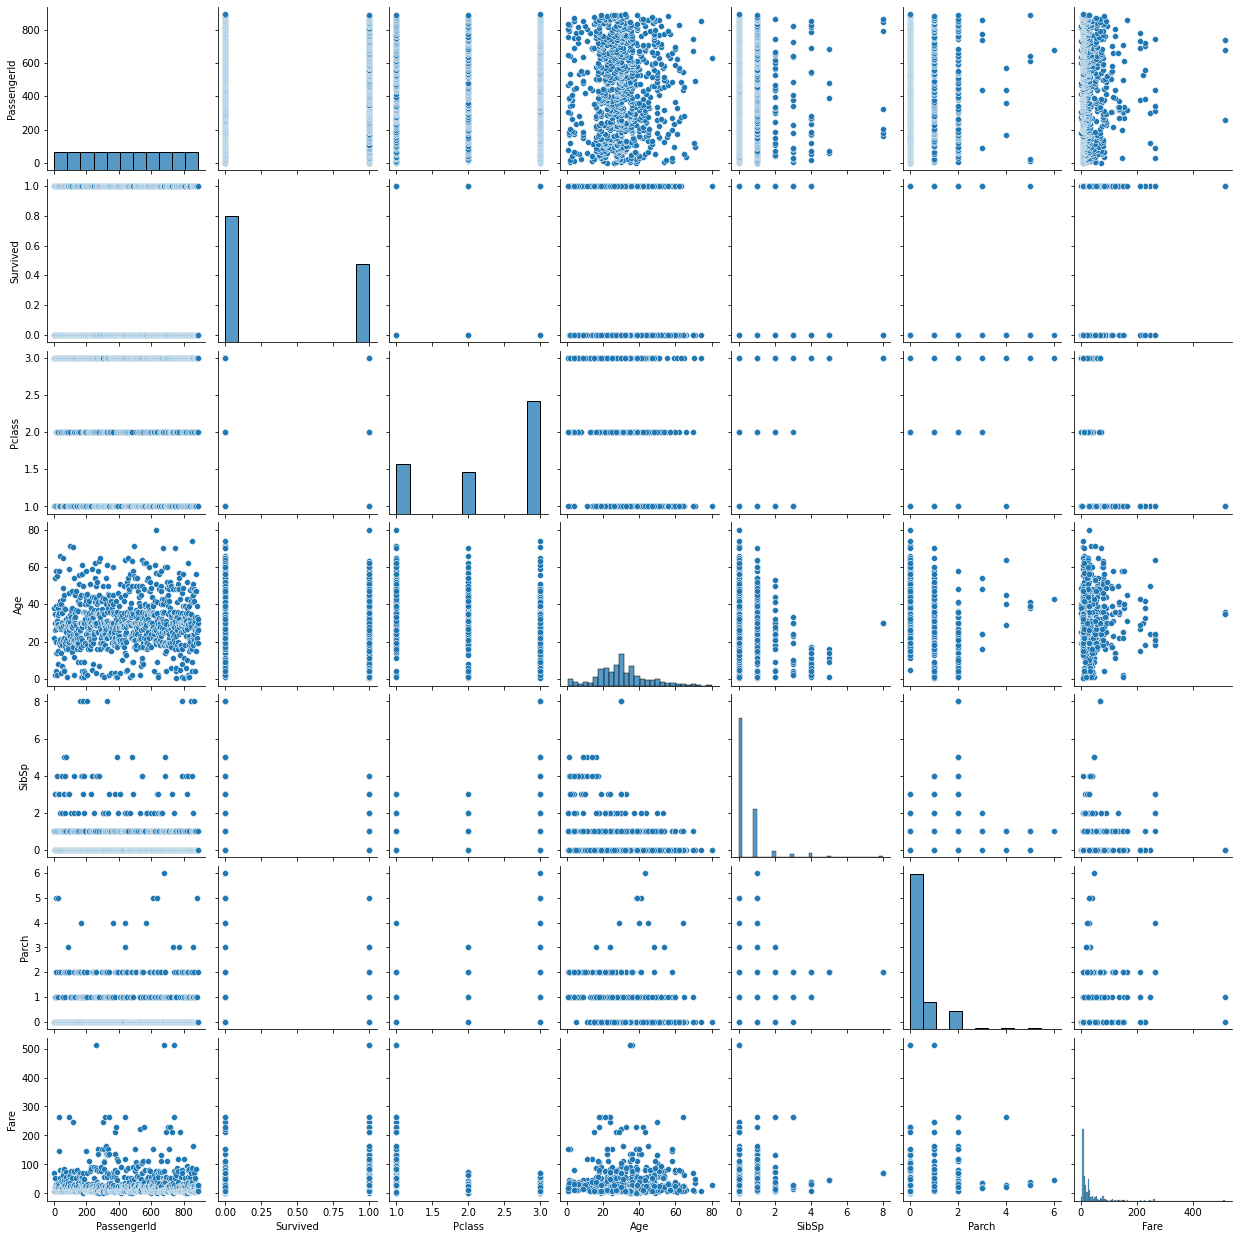

In [30]:
# Use seaborn to create a pairplot of df_train, colored by 'Survived'. 
# A pairplot is a great way to display most of the information that you have already 
# discovered in a single grid of plots.
sns.pairplot(df_train_drop)
plt.show()

**Interpretation:** 
- A pairplot is a great way to display most of the information that we have already 
- Discovered in a single grid of plots.